| **Inicio** | **atrás 3** |
|----------- |-------------- |
| [🏠](../../../README.md) | [⏪](./3.ALGORITMOS_DE_CLUSTERING.ipynb)|

# **4. MÉTODOS AVANZADOS PARA MACHINE LEARNING**

## **Estratégias para la calibración de hiper parámetros**

La calibración de hiperparámetros es un proceso importante en el aprendizaje automático para encontrar la mejor combinación de hiperparámetros de un modelo con el fin de maximizar su rendimiento. Existen varias estrategias para realizar la calibración de hiperparámetros, y a continuación te explicaré tres de las más comunes: búsqueda exhaustiva, búsqueda aleatoria y optimización bayesiana.

* **Búsqueda Exhaustiva:**

La búsqueda exhaustiva implica probar todas las combinaciones posibles de valores de hiperparámetros dentro de un rango definido. Es una estrategia sencilla pero computacionalmente costosa, ya que el número de combinaciones aumenta rápidamente con la cantidad de hiperparámetros y sus valores posibles. A continuación se muestra un ejemplo de búsqueda exhaustiva utilizando la biblioteca Scikit-learn en Python:

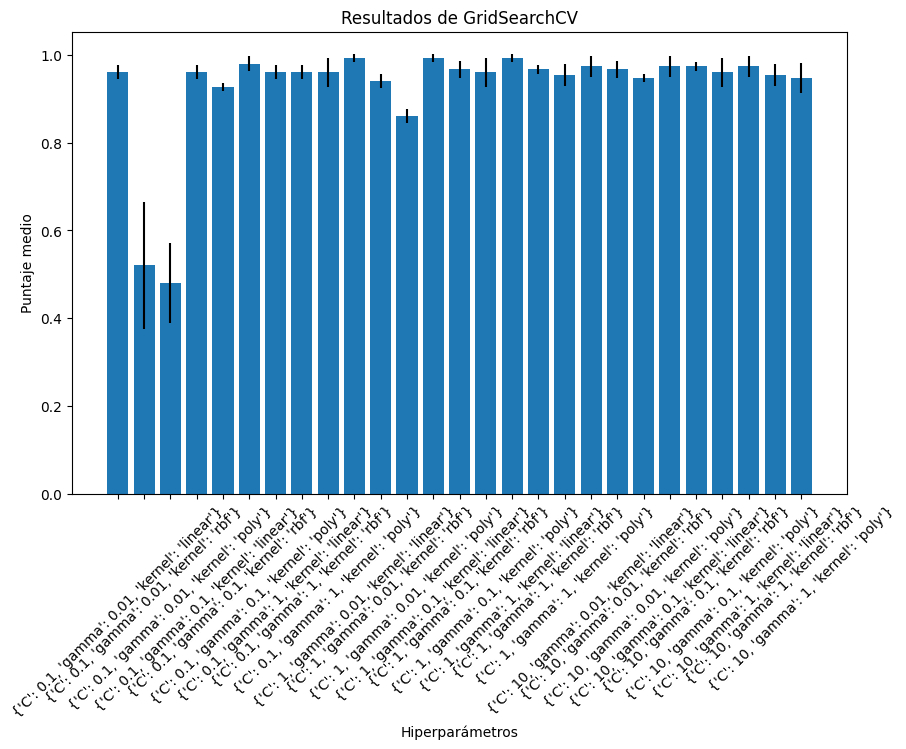

Mejor estimador: SVC(C=1, gamma=0.01, kernel='linear')
Mejores hiperparámetros: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Mejor puntaje: 0.9933333333333333


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris  # Puedes cargar tu propio conjunto de datos

# Cargar el conjunto de datos (puedes reemplazar esto con tu propio conjunto de datos)
iris = load_iris()
X = iris.data
y = iris.target

# Definir el modelo SVM
svm_model = SVC()

# Definir los parámetros que deseas buscar en la cuadrícula
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy')

# Realizar la búsqueda en la cuadrícula
grid_search.fit(X, y)

# Obtener los puntajes y los valores de los hiperparámetros
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']
params = results['params']

# Crear un gráfico de barras para mostrar los puntajes medios y las desviaciones estándar
x = np.arange(len(mean_scores))
plt.figure(figsize=(10, 6))
plt.bar(x, mean_scores, yerr=std_scores)
plt.xticks(x, [str(p) for p in params], rotation=45)
plt.xlabel('Hiperparámetros')
plt.ylabel('Puntaje medio')
plt.title('Resultados de GridSearchCV')
plt.show()

# Obtener el mejor estimador y los mejores hiperparámetros
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejor estimador:", best_estimator)
print("Mejores hiperparámetros:", best_params)
print("Mejor puntaje:", best_score)

En este ejemplo, utilizamos la función `GridSearchCV` de Scikit-learn para realizar una búsqueda exhaustiva de los hiperparámetros del modelo `SVC`. Especificamos los valores posibles para los hiperparámetros '`C`' y '`kernel`' y ajustamos el modelo utilizando todos los conjuntos de valores posibles. Al final, obtenemos los mejores hiperparámetros encontrados y el mejor puntaje obtenido durante la búsqueda.

* **Búsqueda Aleatoria:**

En lugar de probar todas las combinaciones posibles, la búsqueda aleatoria selecciona de forma aleatoria un subconjunto de combinaciones de hiperparámetros para evaluar. Esta estrategia es más eficiente computacionalmente y puede ser efectiva para encontrar buenas configuraciones de hiperparámetros sin tener que explorar todo el espacio de búsqueda. A continuación se muestra un ejemplo de búsqueda aleatoria utilizando la biblioteca Scikit-learn en Python:

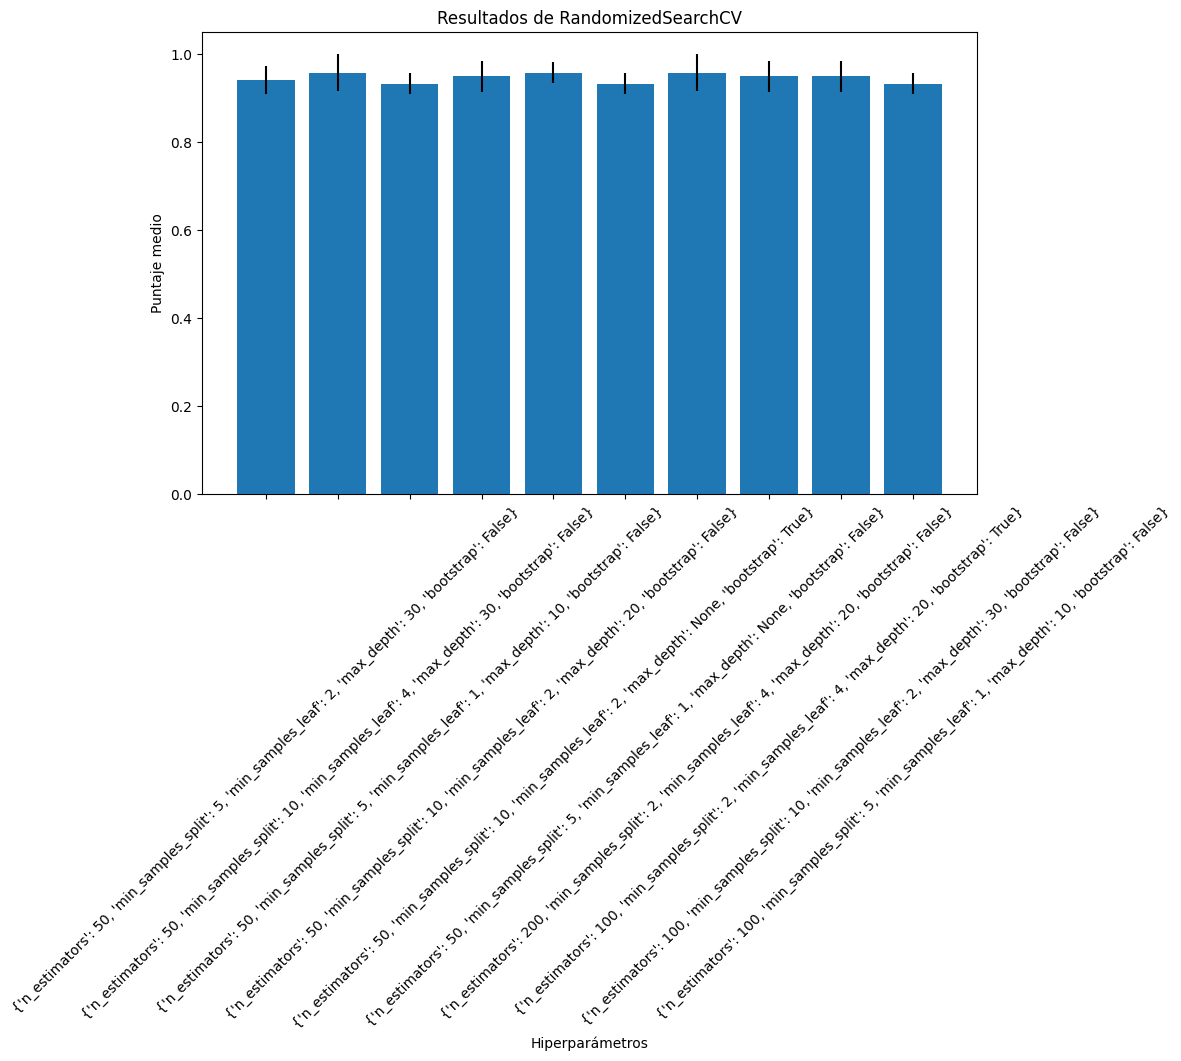

Mejor estimador: RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=50)
Mejores hiperparámetros: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': False}
Mejor puntaje: 0.9583333333333334


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris  # Puedes cargar tu propio conjunto de datos

# Cargar el conjunto de datos (puedes reemplazar esto con tu propio conjunto de datos)
iris = load_iris()
X = iris.data
y = iris.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de bosque aleatorio
rf_model = RandomForestClassifier()

# Definir los parámetros que deseas explorar en la búsqueda aleatoria
param_dist = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

# Crear el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)

# Realizar la búsqueda aleatoria
random_search.fit(X_train, y_train)

# Obtener los puntajes y los valores de los hiperparámetros
results = random_search.cv_results_
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']
params = results['params']

# Crear un gráfico de barras para mostrar los puntajes medios y las desviaciones estándar
x = np.arange(len(mean_scores))
plt.figure(figsize=(10, 6))
plt.bar(x, mean_scores, yerr=std_scores)
plt.xticks(x, [str(p) for p in params], rotation=45)
plt.xlabel('Hiperparámetros')
plt.ylabel('Puntaje medio')
plt.title('Resultados de RandomizedSearchCV')
plt.show()

# Obtener el mejor estimador y los mejores hiperparámetros
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Mejor estimador:", best_estimator)
print("Mejores hiperparámetros:", best_params)
print("Mejor puntaje:", best_score)

En este ejemplo, utilizamos la función `RandomizedSearchCV` de Scikit-learn para realizar una búsqueda aleatoria de los hiperparámetros del modelo `RandomForestClassifier`. Especificamos los rangos posibles para los hiperparámetros '`n_estimators`', '`max_depth`' y '`min_samples_split`', y ajustamos el modelo utilizando una selección aleatoria de combinaciones. Al final, obtenemos los mejores hiperparámetros encontrados y el mejor puntaje obtenido durante la búsqueda.

* **Optimización Bayesiana:**

La optimización bayesiana es una estrategia más avanzada que utiliza modelos probabilísticos para encontrar la mejor combinación de hiperparámetros. Estos modelos se actualizan a medida que se evalúan más combinaciones, lo que permite una exploración más eficiente del espacio de búsqueda. Una biblioteca popular para la optimización bayesiana es scikit-optimize (`skopt`). A continuación se muestra un ejemplo de optimización bayesiana utilizando skopt en Python:

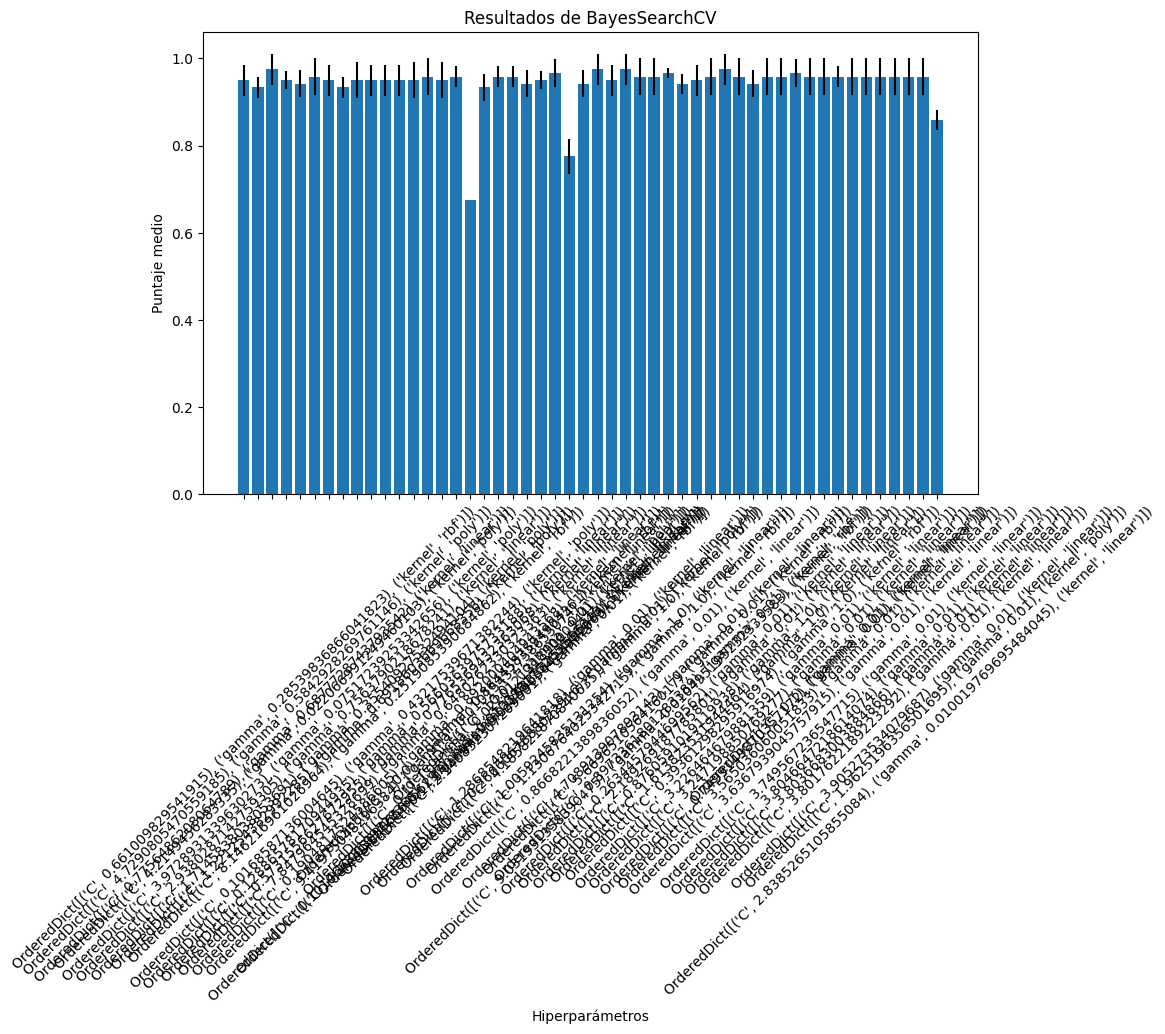

Mejor estimador: SVC(C=0.7756486208064789, gamma=0.6877728743793542, kernel='linear')
Mejores hiperparámetros: OrderedDict([('C', 0.7756486208064789), ('gamma', 0.6877728743793542), ('kernel', 'linear')])
Mejor puntaje: 0.975


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos (puedes reemplazar esto con tu propio conjunto de datos)
iris = load_iris()
X = iris.data
y = iris.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo SVM
svm_model = SVC()

# Definir los límites para la búsqueda bayesiana
param_bounds = {'C': (0.1, 10.0, 'log-uniform'),
                'gamma': (0.01, 1.0, 'log-uniform'),
                'kernel': ['linear', 'rbf', 'poly']}

# Crear el objeto BayesSearchCV
bayes_search = BayesSearchCV(svm_model, param_bounds, n_iter=50, cv=3, scoring='accuracy', random_state=42)

# Realizar la búsqueda bayesiana
bayes_search.fit(X_train, y_train)

# Obtener los puntajes y los valores de los hiperparámetros
results = bayes_search.cv_results_
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']
params = results['params']

# Crear un gráfico de barras para mostrar los puntajes medios y las desviaciones estándar
x = np.arange(len(mean_scores))
plt.figure(figsize=(10, 6))
plt.bar(x, mean_scores, yerr=std_scores)
plt.xticks(x, [str(p) for p in params], rotation=45)
plt.xlabel('Hiperparámetros')
plt.ylabel('Puntaje medio')
plt.title('Resultados de BayesSearchCV')
plt.show()

# Obtener el mejor estimador y los mejores hiperparámetros
best_estimator = bayes_search.best_estimator_
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

print("Mejor estimador:", best_estimator)
print("Mejores hiperparámetros:", best_params)
print("Mejor puntaje:", best_score)

En este ejemplo, utilizamos la clase `BayesSearchCV` de skopt para realizar una optimización bayesiana de los hiperparámetros del modelo `SVC`. Especificamos los rangos posibles para el hiperparámetro '`C`' utilizando una distribución logarítmica y definimos los posibles valores para el hiperparámetro '`kernel`'. Al final, obtenemos los mejores hiperparámetros encontrados y el mejor puntaje obtenido durante la búsqueda.

Estas estrategias de calibración de hiperparámetros son solo algunas de las muchas disponibles. Cada una tiene sus propias ventajas y desventajas, y la elección de la estrategia dependerá del problema y los recursos disponibles.

## **Métodos de boosting**

El método de boosting es una técnica de aprendizaje automático que combina varios modelos de aprendizaje débiles para formar un modelo más fuerte y preciso. En lugar de utilizar un solo modelo para hacer predicciones, el boosting crea una secuencia de modelos débiles, donde cada modelo se enfoca en corregir los errores cometidos por los modelos anteriores. De esta manera, se obtiene un modelo final más robusto y generalizable.

El proceso de boosting funciona de la siguiente manera:

1. Selecciona un conjunto de entrenamiento y asigna pesos iguales a cada muestra.

2. Entrena un modelo débil utilizando el conjunto de entrenamiento ponderado.

3. Evalúa el modelo débil y calcula el error ponderado.

4. Aumenta el peso de las muestras que fueron clasificadas incorrectamente por el modelo débil.

5. Repite los pasos `2` a `4` varias veces, creando una secuencia de modelos débiles.

6. Asigna un peso a cada modelo débil de acuerdo con su rendimiento en la clasificación.

7. Combina los modelos débiles ponderados para formar un modelo final, donde los modelos con mejor rendimiento tienen un mayor peso.

Un algoritmo popular de boosting es el algoritmo XGBoost (Extreme Gradient Boosting), que utiliza gradient boosting para construir un modelo de boosting. A continuación, se presenta un ejemplo de cómo utilizar XGBoost en Python:

In [10]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos de ejemplo
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir los datos al formato específico de XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definir los hiperparámetros del modelo
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': 3
}

# Entrenar el modelo
num_rounds = 10
model = xgb.train(params, dtrain, num_rounds)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(dtest)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Precisión del modelo: %.2f" % accuracy)

Precisión del modelo: 1.00


En este ejemplo, se utiliza el conjunto de datos `Iris` para entrenar un modelo de clasificación utilizando XGBoost. El conjunto de datos se divide en conjuntos de entrenamiento y prueba, y luego se entrena un modelo utilizando los hiperparámetros especificados. Finalmente, se realizan predicciones en el conjunto de prueba y se calcula la precisión del modelo.

La visualización de los resultados puede variar según las preferencias y las bibliotecas utilizadas. En este caso, se muestra la precisión del modelo en la terminal mediante la función print. Sin embargo, se pueden utilizar otras bibliotecas, como matplotlib, para generar gráficos adicionales, como curvas de aprendizaje o importancia de características.

## **Ensemble learning**

Ensemble learning, o aprendizaje conjunto, es una técnica de aprendizaje automático que combina múltiples modelos de aprendizaje para mejorar la precisión y el rendimiento general del sistema. El objetivo del ensemble learning es aprovechar la diversidad de los modelos individuales para obtener mejores resultados en comparación con un solo modelo.

Existen diferentes enfoques para implementar ensemble learning, entre los cuales se destacan:

1. **Bagging (Bootstrap Aggregating):** En este enfoque, se crea un conjunto de modelos individuales, cada uno entrenado con una muestra aleatoria del conjunto de datos de entrenamiento. Cada modelo realiza predicciones independientes y, finalmente, las predicciones se combinan mediante votación o promedio para obtener el resultado final. Un ejemplo popular de bagging es el algoritmo Random Forest.

2. **Boosting:** El boosting es un enfoque secuencial en el que se construyen múltiples modelos débiles en una secuencia, donde cada modelo se enfoca en corregir los errores cometidos por los modelos anteriores. Los modelos débiles se combinan mediante ponderación para formar un modelo final más fuerte. Ejemplos de algoritmos de boosting incluyen AdaBoost, Gradient Boosting y XGBoost.

3. **Stacking:** En stacking, se construye un modelo final utilizando las predicciones de varios modelos individuales. En lugar de combinar las predicciones directamente, se utiliza otro modelo (denominado meta-modelo o modelo de nivel superior) para aprender cómo combinar las predicciones de los modelos individuales. Los modelos individuales se consideran modelos de nivel inferior. El meta-modelo toma las predicciones de los modelos de nivel inferior como características y realiza la predicción final. Este enfoque permite que el modelo final aprenda de las fortalezas y debilidades de los modelos individuales.

A continuación, se presenta un ejemplo de ensemble learning utilizando la técnica de bagging con Random Forest en Python:

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos de ejemplo
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo base para el ensemble (Random Forest)
base_model = DecisionTreeClassifier()

# Definir el ensemble utilizando Bagging
ensemble_model = BaggingClassifier(base_model, n_estimators=10)

# Entrenar el ensemble
ensemble_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = ensemble_model.predict(X_test)

# Evaluar la precisión del ensemble
accuracy = accuracy_score(y_test, predictions)
print("Precisión del ensemble: %.2f" % accuracy)

Precisión del ensemble: 1.00


En este ejemplo, se utiliza el conjunto de datos `Iris` para entrenar un ensemble de clasificación utilizando Bagging con Random Forest. Se divide el conjunto de datos en conjuntos de entrenamiento y prueba, se define un modelo base (en este caso, un árbol de decisión), y se crea el ensemble utilizando Bagging. Luego, se entrena el ensemble utilizando el conjunto de entrenamiento y se realizan predicciones en el conjunto de prueba. Finalmente, se evalúa la precisión del ensemble.

La visualización de los resultados puede variar según las preferencias y las bibliotecas utilizadas. En este caso, se muestra la precisión del ensemble en la terminal mediante la función print. Sin embargo, se pueden utilizar otras bibliotecas, como matplotlib, para generar gráficos adicionales, como curvas de aprendizaje o matrices de confusión.

![Ensemble learning](../img/Ensemble%20learning.png "Ensemble learning")

## **Métodos de bagging**

Los métodos de bagging (Bootstrap Aggregating) son técnicas de aprendizaje automático en las que se generan múltiples modelos a partir de muestras aleatorias con reemplazo del conjunto de datos original y luego se combinan las predicciones de estos modelos para obtener una predicción final.

A continuación, te mostraré un ejemplo de cómo utilizar el método de bagging con el algoritmo de árbol de decisión en Python utilizando la biblioteca scikit-learn:

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos de ejemplo
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador de árbol de decisión
base_model = DecisionTreeClassifier()

# Crear un clasificador de bagging
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Entrenar el modelo de bagging
bagging_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = bagging_model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Precisión del modelo de bagging: %.2f" % accuracy)

Precisión del modelo de bagging: 1.00


En este ejemplo, se crea un clasificador de bagging utilizando un clasificador base de árbol de decisión. El parámetro `n_estimators` especifica el número de estimadores (modelos de árbol de decisión) que se generarán. En este caso, se generan 10 modelos.

Una vez entrenado el modelo de bagging, se realizan predicciones en el conjunto de prueba y se evalúa la precisión del modelo.

El método de bagging mejora la precisión y la estabilidad del modelo al reducir la varianza y el sobreajuste. Al generar múltiples modelos a partir de muestras aleatorias, se capturan diferentes aspectos y variaciones de los datos, lo que resulta en una predicción más robusta y generalizada.

![Métodos de bagging](../img/M%C3%A9todos%20de%20bagging.png "Métodos de bagging")

## **Despliegue básico**

El despliegue básico se refiere al proceso de implementar y poner en funcionamiento un modelo de aprendizaje automático en un entorno de producción para que pueda ser utilizado de manera efectiva. Esto implica llevar el modelo entrenado y todas las dependencias necesarias a un entorno de producción, donde puede recibir entradas, generar predicciones y proporcionar resultados a los usuarios o sistemas externos.

A continuación, te mostraré un ejemplo de cómo realizar un despliegue básico de un modelo de aprendizaje automático en Python utilizando la biblioteca Flask:

* **Preparación del modelo:**

* Entrena y ajusta un modelo de aprendizaje automático utilizando los datos de entrenamiento adecuados.
* Guarda el modelo entrenado en un archivo o en un formato compatible.

* **Creación de una aplicación web con Flask:**

* Importa la biblioteca Flask.
* Crea una instancia de la aplicación Flask.
* Define una ruta para recibir las solicitudes de predicción.

```
from flask import Flask, request, jsonify
import joblib

# Cargar el modelo entrenado
model = joblib.load('modelo_entrenado.pkl')

# Crear la aplicación Flask
app = Flask(__name__)

# Definir una ruta para recibir las solicitudes de predicción
@app.route('/predict', methods=['POST'])
def predict():
    # Obtener los datos de entrada
    data = request.get_json()
    
    # Realizar la predicción utilizando el modelo cargado
    prediction = model.predict(data)
    
    # Devolver la predicción como respuesta en formato JSON
    return jsonify({'prediction': prediction.tolist()})

# Ejecutar la aplicación Flask en el servidor local
if __name__ == '__main__':
    app.run()
```

En este ejemplo, se crea una aplicación web utilizando Flask. La ruta `/predict` está configurada para recibir solicitudes de predicción mediante el método `POST`. Cuando se recibe una solicitud en esta ruta, los datos de entrada se obtienen del cuerpo de la solicitud y se pasan al modelo cargado para generar una predicción. La predicción se devuelve como respuesta en formato `JSON`.

1. **Ejecución del servidor de la aplicación:**

* Ejecuta el archivo Python para iniciar el servidor Flask y escuchar las solicitudes entrantes.

Una vez que la aplicación esté en funcionamiento, podrás enviar solicitudes POST a la ruta `/predict` con los datos de entrada y recibir las predicciones generadas por el modelo.

Es importante tener en cuenta que este ejemplo es un despliegue básico y puede requerir ajustes adicionales según los requisitos específicos de tu entorno de producción, como la gestión de errores, la autenticación y la escalabilidad. Sin embargo, proporciona una base sólida para comenzar a desplegar modelos de aprendizaje automático y utilizarlos en aplicaciones o servicios en producción.

| **Inicio** | **atrás 3** |
|----------- |-------------- |
| [🏠](../../../README.md) | [⏪](./3.ALGORITMOS_DE_CLUSTERING.ipynb)|